In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os

In [43]:
dir1 = os.path.join('./tmp/both')
data = tf.keras.utils.image_dataset_from_directory(dir1, label_mode='categorical')
data_iterator = data.as_numpy_iterator()

Found 339 files belonging to 3 classes.


In [42]:
 tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [44]:
batch = data_iterator.next()

In [12]:
batch[1]
# 0 screenshots
# 1 keep
# 2 work
# 100 screenshots
# 010 keep
# 001 work

array([2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 1, 1, 1, 0, 2, 0, 1, 2], dtype=int32)

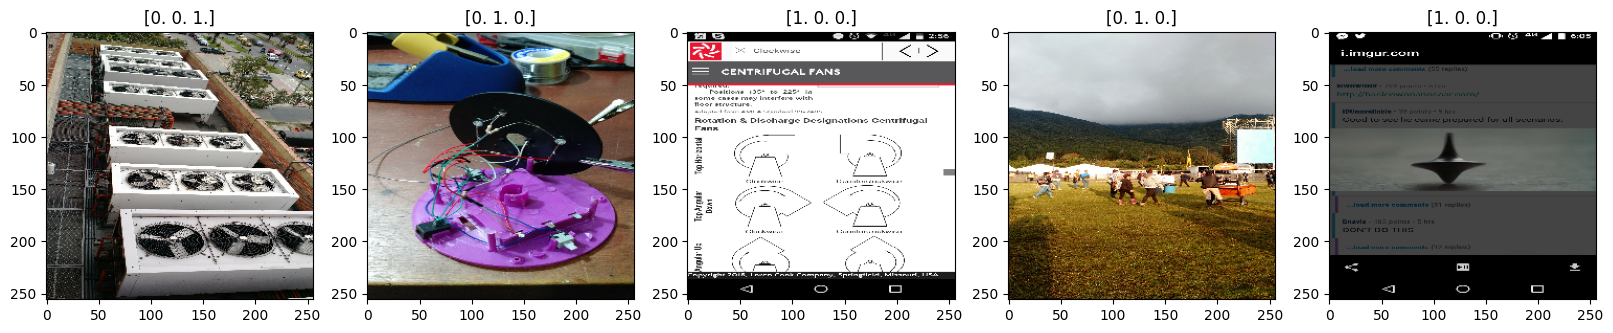

In [45]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [46]:
# Scale data
data = data.map(lambda x, y: (x / 255.0, y))
scaled_iterator = data.as_numpy_iterator()


In [47]:
batch = scaled_iterator.next()

In [48]:
batch[0].max()


1.0

In [36]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [49]:
# Split data
test_size = int(0.1 * len(data)) or 1
val_size = int(0.2 * len(data)) or 1
train_size = len(data) - test_size - val_size
print(train_size, val_size, test_size)

8 2 1


In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [51]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size (batch[0].shape) of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [52]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size (batch[0].shape) of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)      

In [53]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
steps_per_epoch = len(train)//train_size
validation_steps = len(val)//val_size
print(f"steps_per_epoch: {steps_per_epoch}")
print(f"validation_steps: {validation_steps}")

history = model.fit(train, epochs=25, validation_data = val, verbose = 1)


steps_per_epoch: 1
validation_steps: 1
Epoch 1/25


2024-08-01 23:04:09.586455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-08-01 23:04:16.058066: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe8c40100c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-01 23:04:16.058104: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-08-01 23:04:16.155428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-01 23:04:16.792347: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 21s 511ms/step - loss: 7.9456 - accuracy: 0.3516 - val_loss: 1.0537 - val_accuracy: 0.4688
Epoch 2/25
8/8 [==============================] - 6s 494ms/step - loss: 1.1333 - accuracy: 0.4414 - val_loss: 1.0328 - val_accuracy: 0.4688
Epoch 3/25
8/8 [==============================] - 6s 582ms/step - loss: 1.0285 - accuracy: 0.5078 - val_loss: 1.0125 - val_accuracy: 0.4062
Epoch 4/25
8/8 [==============================] - 9s 1s/step - loss: 0.9946 - accuracy: 0.5234 - val_loss: 1.3875 - val_accuracy: 0.4844
Epoch 5/25
8/8 [==============================] - 6s 504ms/step - loss: 0.8476 - accuracy: 0.6367 - val_loss: 0.7827 - val_accuracy: 0.6250
Epoch 6/25
8/8 [==============================] - 6s 503ms/step - loss: 0.8893 - accuracy: 0.5352 - val_loss: 0.7182 - val_accuracy: 0.8594
Epoch 7/25
8/8 [==============================] - 6s 554ms/step - loss: 0.7982 - accuracy: 0.6719 - val_loss: 0.6786 - val_accuracy: 0.7969
Epoch 8/25
8/8 [=================

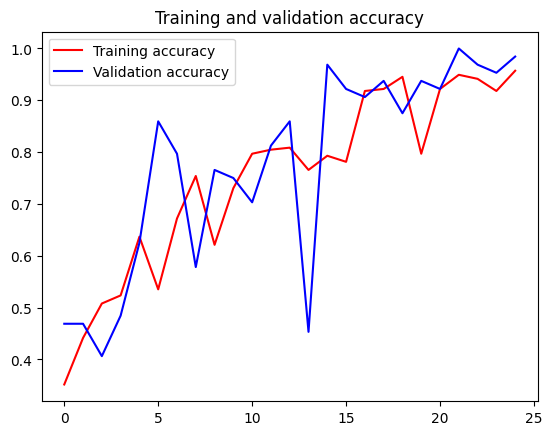

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [56]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
rec = Recall()
cat_acc = CategoricalAccuracy()

In [57]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    cat_acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [58]:
print(f"Precision: {pre.result().numpy()}")
print(f"Recall: {rec.result().numpy()}")
print(f"Categorical Accuracy: {cat_acc.result().numpy()}")

# 100 screenshots
# 010 keep
# 001 work

Precision: 1.0
Recall: 1.0
Categorical Accuracy: 1.0


In [61]:
import matplotlib.image as mpimg

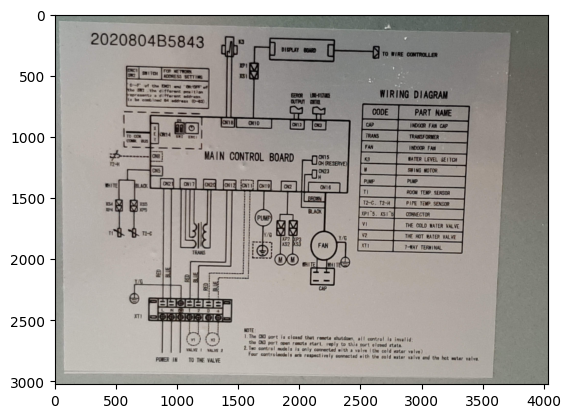

1/1 [==============================] - 0s 24ms/step
screenshot


In [72]:
img_path = './tmp/both/ssh.jpg'
# img_path = './tmp/both/wrk.jpg'
# img_path = './tmp/both/kp.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, [256, 256])
yhat = model.predict(np.expand_dims(resize/255.0, 0))
# get index of max value in array
pred = np.argmax(yhat)
if pred == 0:
    print("screenshot")
elif pred == 1:
    print("keep")
else:
    print("work")
# 100 screenshots
# 010 keep
# 001 work

In [67]:
resize = tf.image.resize(img, [256, 256])
yhat = model.predict(np.expand_dims(resize/255.0, 0))
# get index of max value in array
pred = np.argmax(yhat)
if pred == 0:
    print("screenshot")
elif pred == 1:
    print("keep")
else:
    print("work")
# 100 screenshots
# 010 keep
# 001 work

1/1 [==============================] - 0s 20ms/step


array([[1.8887636e-08, 9.9999356e-01, 6.3847019e-06]], dtype=float32)

In [69]:
# get index of max value in array
pred = np.argmax(yhat)
if pred == 0:
    print("screenshot")
elif pred == 1:
    print("keep")
else:
    print("work")

1